#  Maze Solver with Turtle Graphics and A*/Greedy Algorithm

This Python program uses the Turtle graphics module to **visualize a maze-solving algorithm** (either Greedy Best-First Search or A* Search). The maze is built from a text grid, and the solution path is displayed as the algorithm explores the space.

##  Imports

In [ ]:
import turtle
import time
import heapq


- `turtle`: Used for graphical drawing.
- `time`: (Not actively used here) Could be used for delays or timing.
- `heapq`: Provides a priority queue for efficient search algorithms (used in A* and Greedy).

##  Screen Setup

In [ ]:
wn = turtle.Screen()
wn.bgcolor("black")
wn.title("A Maze Solving Program")
wn.setup(1300, 700)


- Sets up a black canvas using Turtle for drawing the maze.
- `wn.setup()` defines the window size.

##  Turtle Classes for Maze Elements

These are custom Turtle objects for different parts of the maze:

In [ ]:
class Maze(turtle.Turtle):
    def __init__(self):
        super().__init__()
        self.shape("square")
        self.color("white")
        self.penup()
        self.speed(0)

class Green(turtle.Turtle):
    def __init__(self):
        super().__init__()
        self.shape("square")
        self.color("green")
        self.penup()
        self.speed(0)

class Blue(turtle.Turtle):
    def __init__(self):
        super().__init__()
        self.shape("square")
        self.color("blue")
        self.penup()
        self.speed(0)

class Red(turtle.Turtle):
    def __init__(self):
        super().__init__()
        self.shape("square")
        self.color("red")
        self.setheading(270)
        self.penup()
        self.speed(0)

class Yellow(turtle.Turtle):
    def __init__(self):
        super().__init__()
        self.shape("circle")
        self.color("yellow")
        self.penup()
        self.speed(0)    # Goal point and final path
    ...


Each class defines a turtle with a shape and color appropriate for its role in the maze.

##  Maze Grid Layout

In [ ]:
grid1 = [
    "++++++++++++++++++++++++++++++++++++++++++++++",
    "+ s             +                            +",
    "+ +++++++++++ +++++++++++++++ ++++++++ +++++ +",
    "+           +                 +        +     +",
    "++ +++++++ ++++++++++++++ ++++++++++++++++++++",
    "++ ++    + ++           + ++                 +",
    "++ ++ ++ + ++ ++ +++++ ++ ++ +++++++++++++++ +",
    "++ ++ ++ + ++ ++ +     ++ ++ ++ ++        ++ +",
    "++ ++ ++++ ++ +++++++++++ ++ ++ +++++ +++ ++ +",
    "++ ++   ++ ++             ++          +++ ++ +",
    "++ ++++ ++ +++++++++++++++++ +++++++++++++++ +",
    "++    + ++                   ++              +",
    "+++++ + +++++++++++++++++++++++ ++++++++++++ +",
    "++ ++ +                   ++          +++ ++ +",
    "++ ++ ++++ ++++++++++++++ ++ +++++ ++ +++ ++ +",
    "++ ++ ++   ++     +    ++ ++ ++    ++     ++ +",
    "++ ++ ++ +++++++ +++++ ++ ++ +++++++++++++++ +",
    "++                     ++ ++ ++              +",
    "+++++ ++ + +++++++++++ ++ ++ ++ ++++++++++++e+",
    "++++++++++++++++++++++++++++++++++++++++++++++",
]


- A 2D grid where:
  - `"+"` = Wall
  - `" "` = Walkable path
  - `"s"` = Start
  - `"e"` = End (goal)

## Heuristic Function

In [ ]:
def heuristic(cell, goal):
    x1, y1 = cell
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)


- Calculates **Manhattan distance** between two points.
- Used by Greedy and A* to estimate how far a cell is from the goal.

## Backtracking the Path

In [ ]:
def backRoute(x, y):
    yellow.goto(x, y)
    yellow.stamp()
    while (x, y) != (start_x, start_y):
        x, y = solution[x, y]
        yellow.goto(x, y)
        yellow.stamp()


- Starts at the goal and **traces the path backwards** using a `solution` dictionary.
- Marks the final path with yellow circles.

## Maze-Solving Function

In [ ]:
def solve(algorithm="greedy"):
    frontier = []
    heapq.heappush(frontier, (heuristic((start_x, start_y), (end_x, end_y)), 0, (start_x, start_y)))
    solution[start_x, start_y] = None
    costs = { (start_x, start_y): 0 }

    while frontier:
        _, g, current = heapq.heappop(frontier)
        x, y = current

        if (x, y) == (end_x, end_y):
            backRoute(x, y)
            return

        for dx, dy in [(-24, 0), (0, -24), (24, 0), (0, 24)]:
            neighbor = (x + dx, y + dy)
            if neighbor in path and neighbor not in visited:
                visited.append(neighbor)
                solution[neighbor] = (x, y)
                blue.goto(neighbor)
                blue.stamp()

                new_cost = costs[(x, y)] + 1
                costs[neighbor] = new_cost

                if algorithm == "greedy":
                    priority = heuristic(neighbor, (end_x, end_y))
                else:
                    priority = new_cost + heuristic(neighbor, (end_x, end_y))

                heapq.heappush(frontier, (priority, new_cost, neighbor))
                green.goto(x, y)
                green.stamp()


This is the core of the program:
- Uses a **priority queue** (via `heapq`) to choose the next best cell.
- Supports:
  - `greedy`: Only considers how close a cell is to the goal.
  - `astar`: Considers both distance from start and to goal.
- Explores neighbors in 4 directions (up, down, left, right).
- Uses blue squares to show visited nodes and green squares to show the frontier.

##  Maze Setup

In [ ]:
def setup_maze(grid):
    global start_x, start_y, end_x, end_y
    for y in range(len(grid)):
        for x in range(len(grid[y])):
            char = grid[y][x]
            screen_x = -588 + (x * 24)
            screen_y = 288 - (y * 24)

            if char == "+":
                maze.goto(screen_x, screen_y)
                maze.stamp()
                walls.append((screen_x, screen_y))
            elif char == " ":
                path.append((screen_x, screen_y))
            elif char == "e":
                end_x, end_y = screen_x, screen_y
                yellow.goto(screen_x, screen_y)
                yellow.stamp()
                path.append((screen_x, screen_y))
            elif char == "s":
                start_x, start_y = screen_x, screen_y
                red.goto(screen_x, screen_y)
                red.stamp()
                path.append((screen_x, screen_y))


- Reads the `grid1` and:
  - Draws walls (white squares)
  - Identifies walkable paths
  - Marks start and end positions

##  Initialization & Execution

In [ ]:
maze = Maze()
red = Red()
...


- Initializes all turtles.
- Collects wall and path data.
- Asks the user to choose between `'greedy'` or `'astar'`.

### Summary

This code:
- Loads a maze from a grid,
- Uses a pathfinding algorithm (Greedy or A*),
- Animates the search process and solution using Turtle graphics.

### Use cases

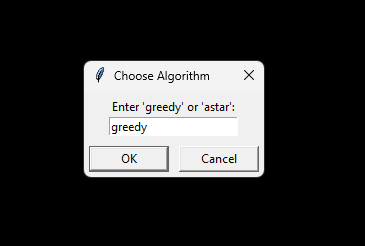

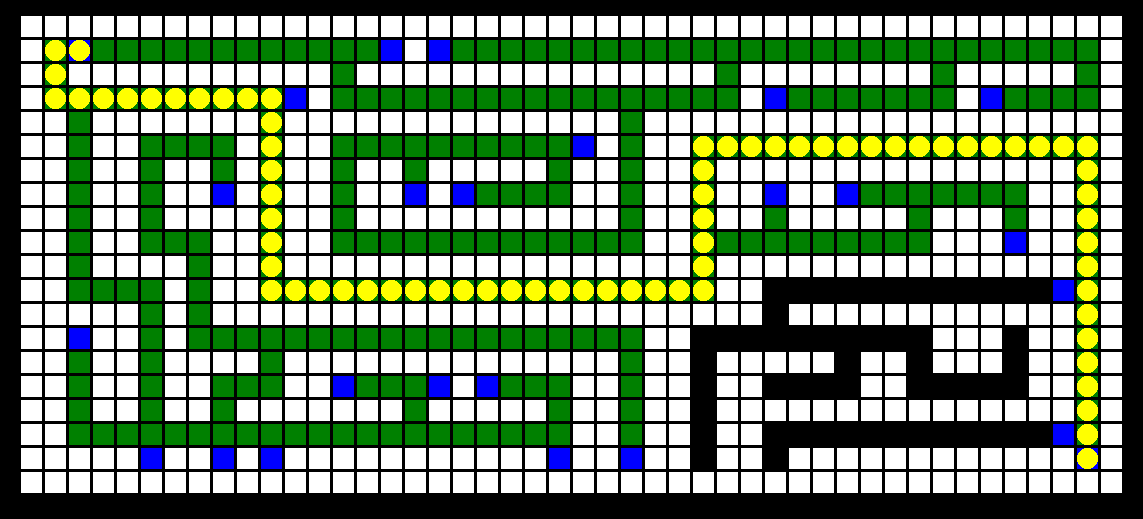

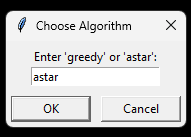

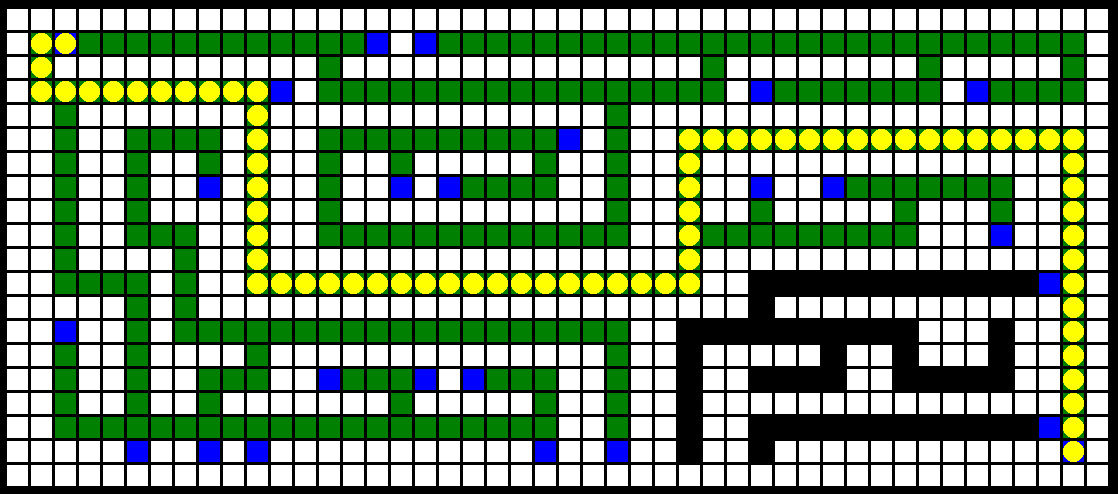

# Simulated Annealing for the Travelling Salesman Problem (TSP) – Namibia Towns

This project solves a variant of the **Travelling Salesman Problem (TSP)** using the **Simulated Annealing** algorithm. It finds a near-optimal path through 10 towns in Namibia **without returning to the starting town (Windhoek)**.

---



## Problem Description

- **Objective**: Visit all 10 towns starting from **Windhoek** and find the shortest path.
- **Constraint**: The route does **not return to Windhoek** at the end.
- **Approach**: Simulated Annealing is used to optimize the route based on a given distance matrix.

---



## Components



### 1. `TSP` Class
Handles the towns and distance calculations.

In [ ]:
class TSP:
    def __init__(self, towns, distance_matrix):
              self.towns = towns
        self.distances = distance_matrix

    def total_distance(self, route):
          return sum(self.distances[route[i]][route[i+1]] for i in range(len(route) - 1))

### 2. `SimulatedAnnealingSolver` Class
Uses Simulated Annealing to minimize the total travel distance.

In [ ]:
class SimulatedAnnealingSolver:
    def __init__(self, tsp, initial_temp=15000, cooling_rate=0.998, max_iter=20000):
        self.tsp = tsp
        self.temp = initial_temp
        self.cooling_rate = cooling_rate
        self.max_iter = max_iter

    def generate_initial_route(self):
        route = list(range(1, len(self.tsp.towns)))  # exclude Windhoek
        random.shuffle(route)
        return [0] + route  # start at Windhoek

    def swap_two_towns(self, route):
        a, b = random.sample(range(1, len(route)), 2)
        new_route = route[:]
        new_route[a], new_route[b] = new_route[b], new_route[a]
        return new_route

    def solve(self):
        current_route = self.generate_initial_route()
        current_cost = self.tsp.total_distance(current_route)
        best_route = current_route[:]
        best_cost = current_cost

        for _ in range(self.max_iter):
            new_route = self.swap_two_towns(current_route)
            new_cost = self.tsp.total_distance(new_route)
            delta = new_cost - current_cost

            if delta < 0 or random.random() < math.exp(-delta / self.temp):
                current_route = new_route
                current_cost = new_cost
                if new_cost < best_cost:
                    best_route = new_route
                    best_cost = new_cost

            self.temp *= self.cooling_rate

        return best_route, best_cost

### 3. Distance Matrix and Coordinates
- Distance matrix: Represents distances between each pair of towns.
- Coordinates: Used for visualizing towns on a 2D plot (not geographically accurate).

---



## Towns Involved

1. Windhoek  
2. Swakopmund  
3. Walvis Bay  
4. Otjiwarongo  
5. Tsumeb  
6. Grootfontein  
7. Mariental  
8. Keetmanshoop  
9. Ondangwa  
10. Oshakati  

---



## Parameters Used

| Parameter       | Value    |
|----------------|----------|
| Initial Temp    | 15000    |
| Cooling Rate    | 0.998    |
| Max Iterations  | 20000    |
| Start City      | Windhoek |

---



In [ ]:
def plot_route(towns, route, title):
   x = [coordinates[towns[i]][0] for i in route]
    y = [coordinates[towns[i]][1] for i in route]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='blue')

    for i in range(len(route)):
        town_name = towns[route[i]]
        plt.text(x[i]+5, y[i]+5, town_name, fontsize=9)

    # Mark start and end
    plt.scatter(x[0], y[0], color='green', s=100, label='Start')
    plt.scatter(x[-1], y[-1], color='red', s=100, label='End')
    plt.legend()

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


- Start town is marked **green**
- End town is marked **red**


## Sample Output



###  Initial Route

```
Windhoek -> Grootfontein -> Otjiwarongo -> Swakopmund -> Tsumeb -> ...
Initial Distance: XXXX.XX km
```



###  Optimized Route

```
Windhoek -> Otjiwarongo -> Tsumeb -> Ondangwa -> Oshakati -> ...
Optimized Distance: YYYY.YY km
```

> The optimized route is visualized with directional lines between towns using matplotlib.

---



## How to Run

1. Install dependencies:

```bash
pip install matplotlib
```

2. Run the script:

```bash
python tsp_simulated_annealing.py
```

3. Two plots will be displayed:
   - Initial route (random)
   - Optimized route (after Simulated Annealing)

---



## Notes

- The problem is **asymmetric and non-circular** (i.e., does not return to the starting point).
- Simulated Annealing is a probabilistic technique and may yield slightly different results on each run.

---



## References

- [Simulated Annealing - Wikipedia](https://en.wikipedia.org/wiki/Simulated_annealing)
- [Travelling Salesman Problem - Wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem)


## Use Cases


### run 1


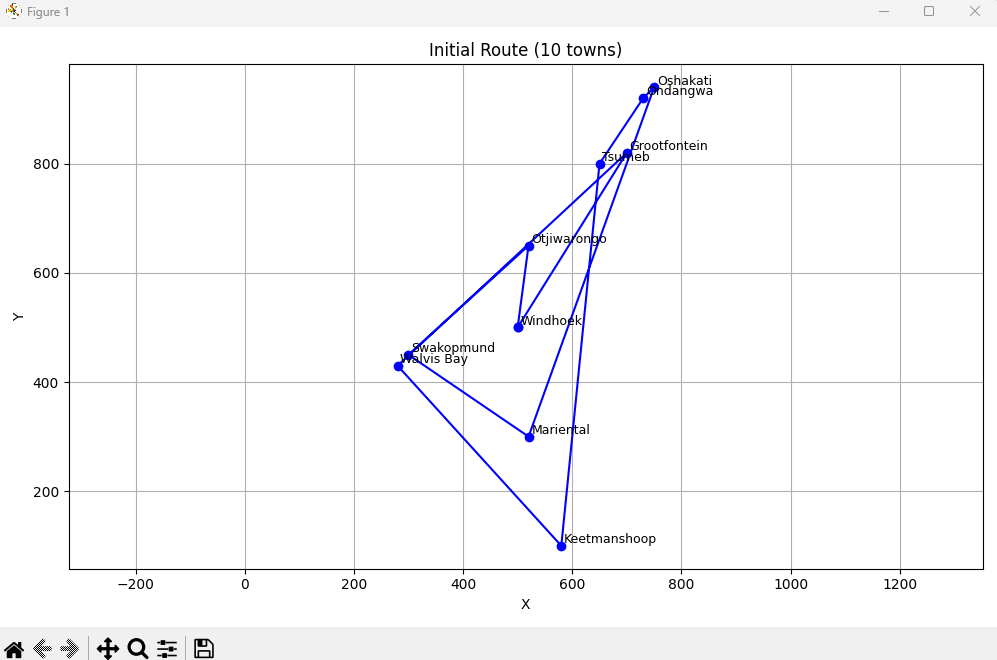

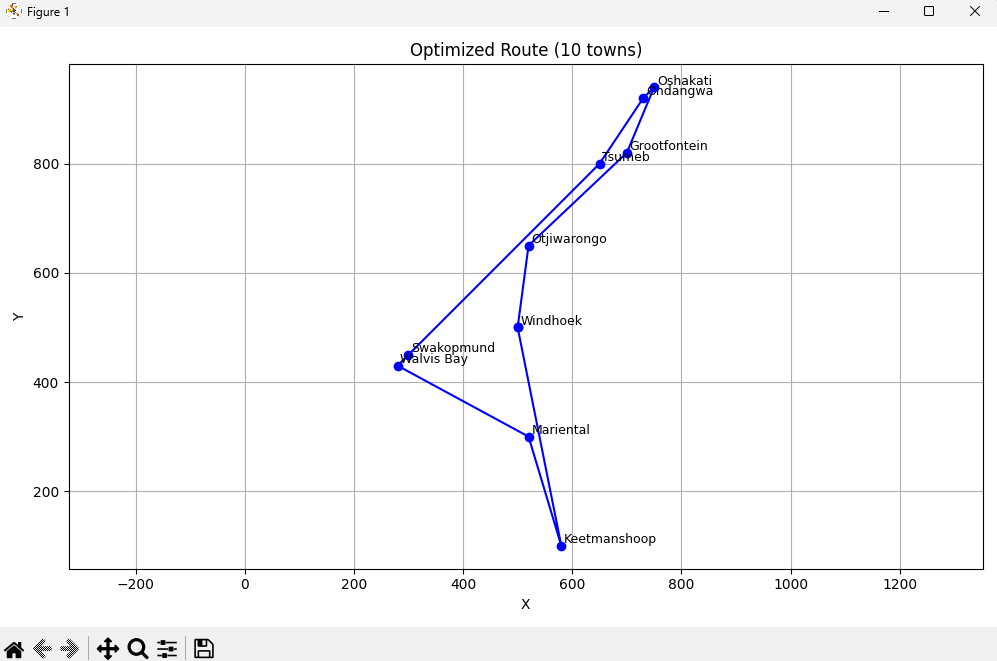

### run2

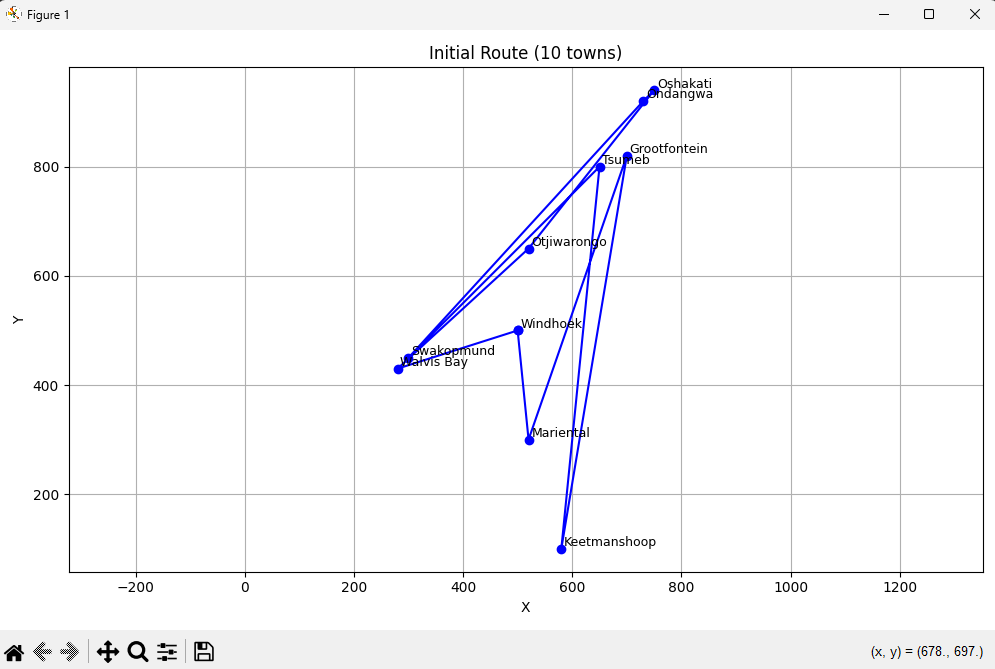

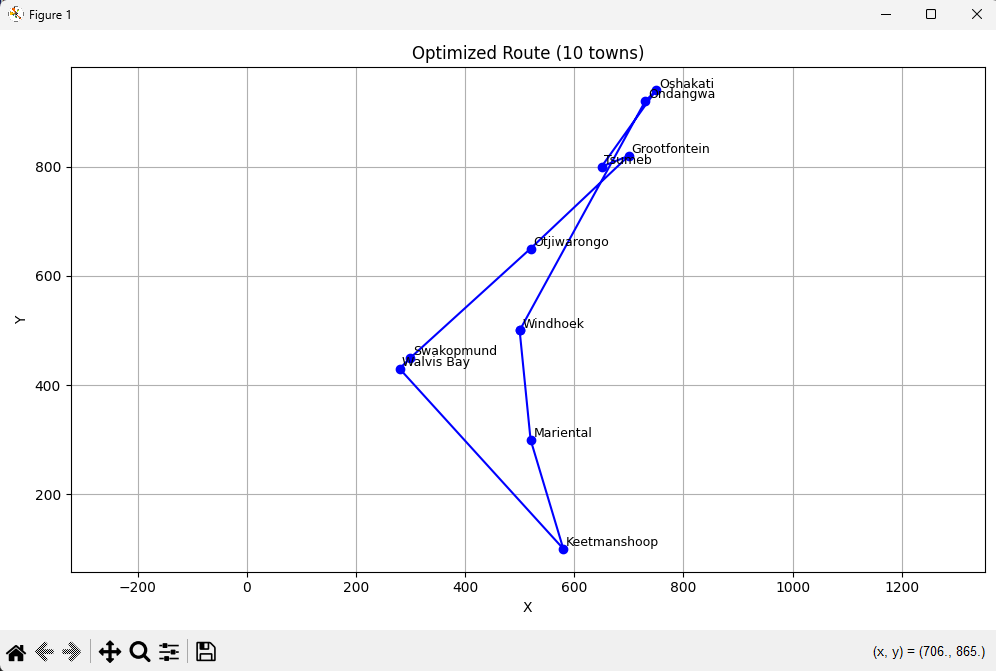

### run 3


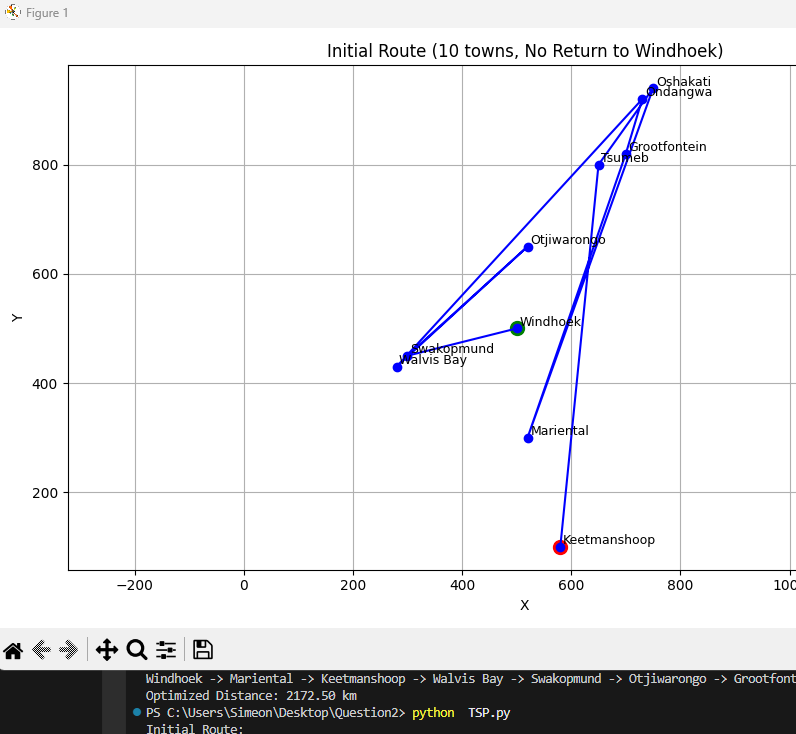

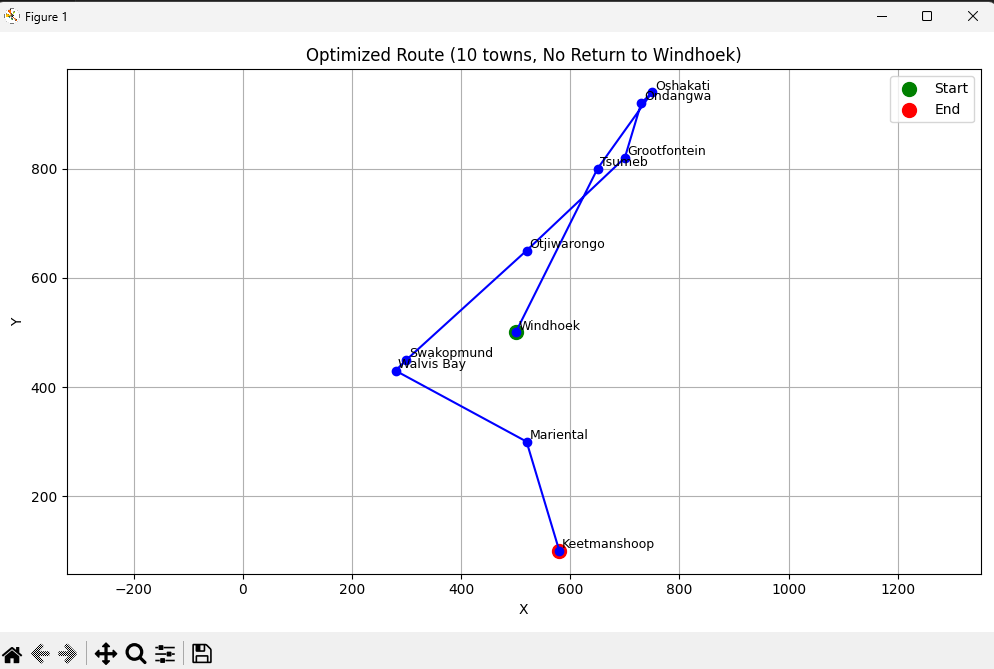

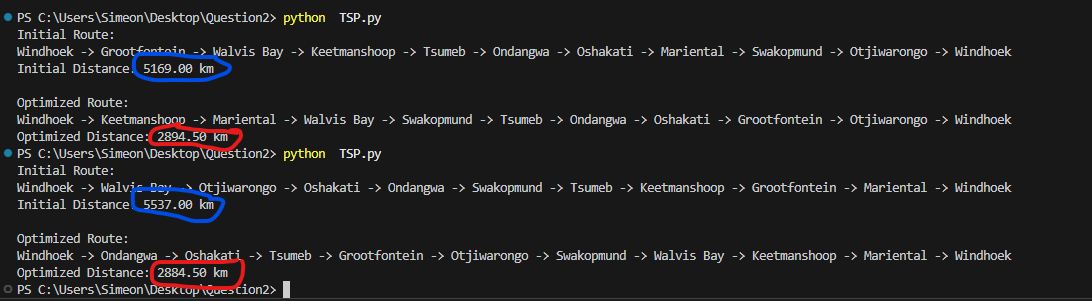

# 🎮 Tic-Tac-Toe with Minimax AI

This notebook demonstrates a complete AI-based Tic-Tac-Toe game using the Minimax algorithm with alpha-beta pruning, as well as adjustable difficulty and testable game logic.

## References
- [GeeksforGeeks: Minimax Algorithm](https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-1-introduction/)
- [YouTube: Coding Train - Tic-Tac-Toe Minimax](https://www.youtube.com/watch?v=trKjYdBASyQ)
- [The Coding Train: Tic-Tac-Toe Minimax](https://thecodingtrain.com/challenges/154-tic-tac-toe-minimax)
- [DataCamp: Minimax AI in Python](https://www.datacamp.com/tutorial/minimax-algorithm-for-ai-in-python)
- [Real Python: Tic-Tac-Toe AI](https://realpython.com/tic-tac-toe-ai-python/)
- [Interface In Game](https://interfaceingame.com)
- [Flask](https://flask.palletsprojects.com/en/stable/)


## 1️⃣ game.py

### TicTacToe Class
This class implements the full logic for playing a game of Tic-Tac-Toe, including:

- Game state management

- Move validation

- Winner checking

- AI opponent using the Minimax algorithm with difficulty levels

In [ ]:
class TicTacToe:

### __init__ Method
Initializes a new game with default settings.

- board: a list of 9 strings (" ") representing the 3x3 grid

- current_player: the player whose turn it is, either "X" or "O"

- difficulty: the AI's difficulty level, defaulting to "impossible" (optimal)

- game_mode: set to "human_vs_ai"; could be extended

- scores: keeps track of wins for "X", "O", and ties

In [ ]:
    def __init__(self):
        self.board = [" " for _ in range(9)]
        self.current_player = "X"
        self.difficulty = "impossible"  
        self.game_mode = "human_vs_ai"  
        self.scores = {"X": 0, "O": 0, "tie": 0}

### available_moves Method
Returns all unoccupied positions on the board.

Uses enumerate() to check each position

Returns a list of indexes (0–8) where the board has " " (empty)

In [ ]:
    def available_moves(self):
        return [i for i, spot in enumerate(self.board) if spot == " "]

### make_move(position) Method
Attempts to place the current player’s mark at the given position.

- Checks if the position is empty

- If valid, places the current player's mark

- Switches turn to the other player

- Returns True if move was made, else False

In [ ]:
    def make_move(self, position):
        if self.board[position] == " ":
            self.board[position] = self.current_player
            self.current_player = "O" if self.current_player == "X" else "X"
            return True
        return False

### check_winner Method
Checks whether the game has a winner or ended in a tie.

- Defines all 8 possible win conditions (rows, columns, diagonals)

- Checks if any condition is fulfilled by the same player

Returns:

- A tuple like ("X", [0, 1, 2]) if a player won

- ("tie", None) if board is full and no winner

- (None, None) if game is still ongoing

In [ ]:
    def check_winner(self):
        winning_combinations = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  
            [0, 4, 8], [2, 4, 6]              
        ]
        
        for combo in winning_combinations:
            if self.board[combo[0]] != " " and self.board[combo[0]] == self.board[combo[1]] == self.board[combo[2]]:
                return self.board[combo[0]], combo
        
        if " " not in self.board:
            return "tie", None
            
        return None, None

### minimax(depth, is_maximizing, alpha, beta) Method
Implements the Minimax algorithm with alpha-beta pruning.

- depth: the level of recursion (helps prioritize quicker wins)

- is_maximizing: True if it's X's turn (the maximizing player)

- alpha: best score the maximizer can guarantee so far

- beta: best score the minimizer can guarantee so far

Returns an integer score:

- +10 - depth if X wins

- -10 + depth if O wins

- 0 for a tie

Also supports adjustable difficulty:

- If difficulty is not "impossible", adds random noise to decision-making to make AI easier to beat.

In [ ]:
    def minimax(self, depth, is_maximizing, alpha=float('-inf'), beta=float('inf')):
        result, _ = self.check_winner()
        
        if result == "X":
            return 10 - depth
        elif result == "O":
            return -10 + depth
        elif result == "tie":
            return 0
            
        if self.difficulty != "impossible" and depth == 0:
            import random
            if self.difficulty == "easy" and random.random() < 0.7:
                return random.randint(-5, 5)
            elif self.difficulty == "medium" and random.random() < 0.4:
                return random.randint(-5, 5)
        
        if is_maximizing:
            best_score = float('-inf')
            for move in self.available_moves():
                self.board[move] = "X"
                score = self.minimax(depth + 1, False, alpha, beta)
                self.board[move] = " "
                best_score = max(score, best_score)
                alpha = max(alpha, best_score)
                if beta <= alpha:
                    break
            return best_score
        else:
            best_score = float('inf')
            for move in self.available_moves():
                self.board[move] = "O"
                score = self.minimax(depth + 1, True, alpha, beta)
                self.board[move] = " "
                best_score = min(score, best_score)
                beta = min(beta, best_score)
                if beta <= alpha:
                    break
            return best_score

### get_best_move Method
Chooses the best move for the current player using Minimax.

- Iterates through all available moves

- Simulates each move temporarily
  
- Uses minimax to evaluate the move

- Keeps track of the best move based on score

- Restores the board after each simulation

- Returns the optimal move's index

In [ ]:
    def get_best_move(self):
        best_score = float('-inf') if self.current_player == "X" else float('inf')
        best_move = None
        
        for move in self.available_moves():
            self.board[move] = self.current_player
            if self.current_player == "X":
                score = self.minimax(0, False)
                if score > best_score:
                    best_score = score
                    best_move = move
            else:
                score = self.minimax(0, True)
                if score < best_score:
                    best_score = score
                    best_move = move
            self.board[move] = " "
            
        return best_move

### reset_board Method
Resets the board to its initial empty state.

- Sets self.board to 9 empty spaces

- Useful when starting a new game without creating a new object

In [ ]:
    def reset_board(self):
        self.board = [" " for _ in range(9)]

## 2️⃣ app.py

### Flask App
This file sets up the Flask web server and connects the user interface with the backend TicTacToe logic. It handles HTTP requests, processes game moves, and returns updated game states in JSON format.

### Import Statements

- Flask: Web framework used to build the backend server.

-  render_template: Renders HTML templates (like index.html).

- request: Handles incoming data from the frontend.

- jsonify: Sends JSON responses.

- TicTacToe: The main game logic imported from game.py.

In [ ]:
from flask import Flask, render_template, request, jsonify
from game import TicTacToe

### App Initialization

- app: Initializes the Flask application.

- game: Creates a single global instance of the TicTacToe game.

In [ ]:
app = Flask(__name__)
game = TicTacToe()

### index() Route
- Renders the front-end HTML when the user opens the web app in the browser.

In [ ]:
@app.route('/')
def index():
    return render_template('index.html')

### /make_move Route

- Handles player move submissions.

- Validates and applies the move.

- Checks for a winner.

- If it's AI's turn next, the AI makes its move.

- Responds with the new board, game status, and scores.

In [ ]:
@app.route('/make_move', methods=['POST'])
def make_move():
    data = request.get_json()
    position = data.get('position')
    
    if game.make_move(position):
        winner, winning_combo = game.check_winner()
        
        if winner:
            update_scores(winner)
            return jsonify({
                'board': game.board,
                'currentPlayer': game.current_player,
                'gameOver': True,
                'winner': winner,
                'winningCombo': winning_combo,
                'scores': game.scores
            })
            
        if game.game_mode == "human_vs_ai":
            ai_position = game.get_best_move()
            game.make_move(ai_position)
            winner, winning_combo = game.check_winner()
            
            if winner:
                update_scores(winner)
                
            return jsonify({
                'board': game.board,
                'currentPlayer': game.current_player,
                'gameOver': winner is not None,
                'winner': winner,
                'winningCombo': winning_combo,
                'scores': game.scores
            })
    
    return jsonify({
        'board': game.board,
        'currentPlayer': game.current_player,
        'gameOver': False,
        'winner': None,
        'scores': game.scores
    })

### /ai_vs_ai Route

- Runs a complete AI vs AI match.

- Resets the board and alternates moves between AI players.

- Collects move history.

- Ends when a winner or tie is determined.

- Returns full match data.

In [ ]:
@app.route('/ai_vs_ai', methods=['POST'])
def ai_vs_ai():
    game.reset_board()
    game.game_mode = "ai_vs_ai"
    
    moves_history = []
    
    while True:
        ai_position = game.get_best_move()
        game.make_move(ai_position)
        moves_history.append({
            'position': ai_position,
            'player': "X" if game.current_player == "O" else "O"
        })
        
        winner, winning_combo = game.check_winner()
        if winner:
            update_scores(winner)
            break
    
    return jsonify({
        'board': game.board,
        'moves': moves_history,
        'gameOver': True,
        'winner': winner,
        'winningCombo': winning_combo,
        'scores': game.scores
    })

###  /set_game_options Route
- Sets game mode (e.g., human vs AI or AI vs AI).

- Sets difficulty level.

- Sets which player goes first.

- Starts the game with an AI move if needed.

In [ ]:
@app.route('/set_game_options', methods=['POST'])
def set_game_options():
    data = request.get_json()
    game.game_mode = data.get('gameMode', 'human_vs_ai')
    game.difficulty = data.get('difficulty', 'impossible')
    player_choice = data.get('playerChoice', 'X')
    
    game.reset_board()
    
    if game.game_mode == "human_vs_ai" and player_choice == "O":
        game.current_player = "X"
        ai_position = game.get_best_move()
        game.make_move(ai_position)
    else:
        game.current_player = "X"
    
    return jsonify({
        'board': game.board,
        'currentPlayer': game.current_player,
        'gameOver': False,
        'winner': None,
        'scores': game.scores
    })

### /reset_game Route
- Resets the game board to its initial state.

- Responds with an empty board and default game values.

In [ ]:
@app.route('/reset_game', methods=['POST'])
def reset_game():
    game.reset_board()
    return jsonify({
        'board': game.board,
        'currentPlayer': game.current_player,
        'gameOver': False,
        'winner': None,
        'scores': game.scores
    })

### update_scores() Function
- Updates the global score tracker (X, O, or tie) depending on who wins the round.

In [ ]:
def update_scores(winner):
    if winner == "tie":
        game.scores["tie"] += 1
    else:
        game.scores[winner] += 1

if __name__ == '__main__':
    app.run(debug=True)

## Test Cases: Verifying Game Logic

Below we test the core logic: board initialization, move making, winner/tie detection, and board reset.


In [ ]:
game = TicTacToe()
print("Initial Board:", game.board)
game.make_move(0)
print("After X at 0:", game.board)
game.make_move(1)
print("After O at 1:", game.board)
game.board = ["X", "X", "X", "O", "O", " ", " ", " ", " "]
winner, combo = game.check_winner()
print("Winner:", winner, "Winning combo:", combo)
game.board = ["X", "O", "X", "O", "X", "O", "O", "X", "O"]
winner, combo = game.check_winner()
print("Winner:", winner, "Winning combo:", combo)
game.reset_board()
print("After reset:", game.board)


## Minimax AI Demo: AI vs AI Game

Here we run a full game between two AIs (both using Minimax) and display the board after each move. This demonstrates the AI's ability to play optimally.


In [ ]:
ai_game = TicTacToe()
ai_game.difficulty = "impossible"
ai_game.game_mode = "ai_vs_ai"
ai_game.reset_board()
moves = []
while True:
    move = ai_game.get_best_move()
    ai_game.make_move(move)
    moves.append((move, ai_game.board.copy()))
    winner, combo = ai_game.check_winner()
    if winner:
        break
for idx, (move, board) in enumerate(moves):
    print(f"Move {idx+1}: {move}")
    print(board[0:3])
    print(board[3:6])
    print(board[6:9])
    print()
print(f"Game Result: {winner}")


## Use cases


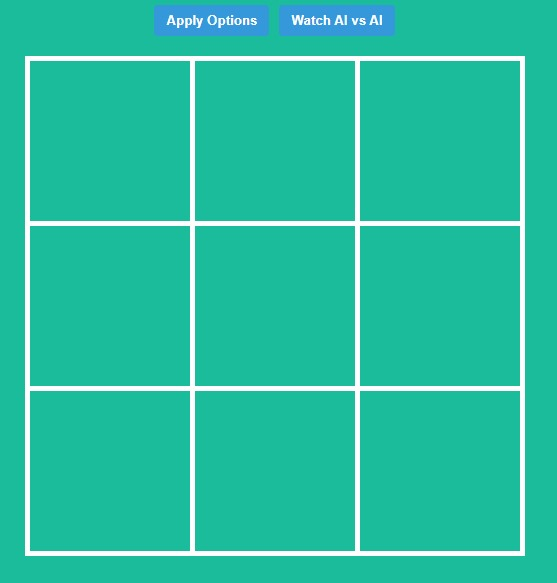

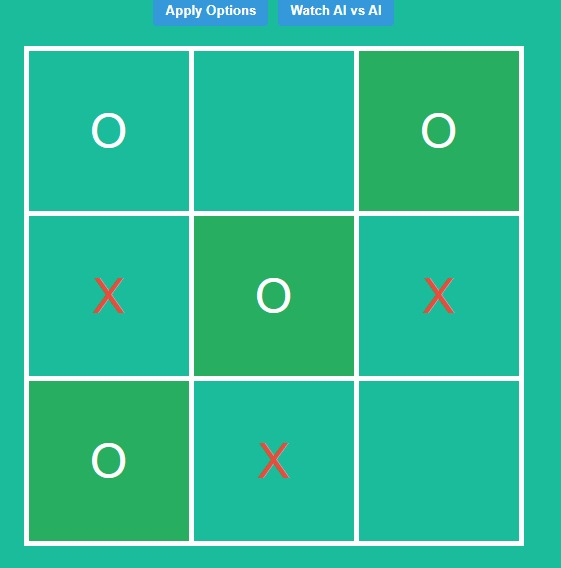

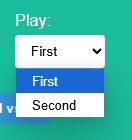

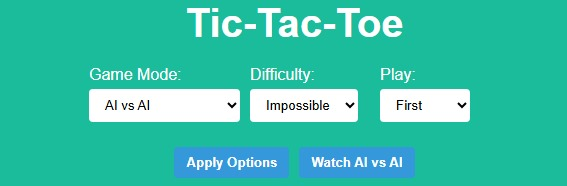

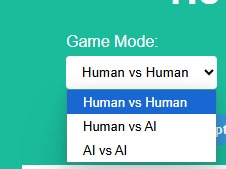

## Conclusion

- The Minimax algorithm enables the AI to play Tic-Tac-Toe optimally (it hardly loses at "impossible" difficulty).
- The game logic is modular and testable, supporting various game modes and difficulties.

# Q-Learning in GridWorld

This project simulates a **5x5 GridWorld** where an agent learns the optimal policy using **Q-learning**. Special transitions (teleportation) and rewards are assigned to specific cells, encouraging the agent to learn effective behavior through exploration.

## Imports and Constants

In [ ]:
import numpy as np
import random
import tkinter as tk

### Environment Configuration

In [ ]:
GRID_SIZE = 5
A, A_PRIME = (0, 1), (4, 1)
B, B_PRIME = (0, 3), (2, 3)
A_REWARD, B_REWARD = 10, 5
ACTIONS = ['N', 'S', 'E', 'W']
ACTION_DELTAS = {'N': (-1, 0), 'S': (1, 0), 'E': (0, 1), 'W': (0, -1)}
ARROWS = {'N': '↑', 'S': '↓', 'E': '→', 'W': '←'}

## Environment Transition Function

In [ ]:
def step(state, action):
    if state == A:
        return A_PRIME, A_REWARD
    elif state == B:
        return B_PRIME, B_REWARD

    delta = ACTION_DELTAS[action]
    new_row, new_col = state[0] + delta[0], state[1] + delta[1]
    if 0 <= new_row < GRID_SIZE and 0 <= new_col < GRID_SIZE:
        return (new_row, new_col), 0
    else:
        return state, -1

## Action Selection: Epsilon-Greedy Policy

In [ ]:
def epsilon_greedy(Q, state):
    if random.random() < EPSILON:
        return random.choice(ACTIONS)
    else:
        max_q = max(Q[state].values())
        return random.choice([a for a in ACTIONS if Q[state][a] == max_q])

## Q-Table Initialization

In [ ]:
def initialize_Q():
    return { (i, j): {a: 0.0 for a in ACTIONS} for i in range(GRID_SIZE) for j in range(GRID_SIZE) }

## Q-Learning Algorithm

In [ ]:
GAMMA = 0.9
EPSILON = 0.1
ALPHA = 0.1
EPISODES = 500
STEPS_PER_EPISODE = 10

def q_learning():
    print("Initializing Gridworld...")
    print(f"Grid size: {GRID_SIZE}x{GRID_SIZE}")
    print(f"Special_states = {{'A': {A}, 'B': {B}}}")
    print(f"Next_to_states = {{'A\'': {A_PRIME}, 'B\'': {B_PRIME}}}")
    print(f"Special_rewards = {{'A': {A_REWARD}, 'B': {B_REWARD}}}")
    print("Starting Q-learning with parameters:")
    print(f" γ = {GAMMA}")
    print(f" ε = {EPSILON}")
    print(f" α = {ALPHA}")
    print(f" Episodes = {EPISODES}")
    print(f"Steps = {EPISODES * STEPS_PER_EPISODE}")

    Q = initialize_Q()

    for _ in range(EPISODES):
        state = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
        for _ in range(STEPS_PER_EPISODE):
            action = epsilon_greedy(Q, state)
            next_state, reward = step(state, action)
            max_next = max(Q[next_state].values())
            Q[state][action] += ALPHA * (reward + GAMMA * max_next - Q[state][action])
            state = next_state

    return Q

## Extracting Value Function & Optimal Policy

In [ ]:
def extract_value_and_policy(Q):
    V = np.zeros((GRID_SIZE, GRID_SIZE))
    policy = np.full((GRID_SIZE, GRID_SIZE), '', dtype=object)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            best_action = max(Q[state], key=Q[state].get)
            V[i, j] = Q[state][best_action]
            policy[i, j] = ARROWS[best_action]
    return V, policy

## Result Printing

In [ ]:
def print_results(V, policy):
    print("Evaluating optimal value function and policy...")
    print("Optimal Value Function:")
    for row in V:
        print(" ".join(f"{val:5.2f}" for val in row))
    print("Optimal Policy (arrows):")
    for row in policy:
        print(" ".join(row))

## GUI Display with Tkinter

In [ ]:
def display_gui(V, policy):
    root = tk.Tk()
    root.title("Q-Learning GridWorld Visualization")

    cell_size = 80
    canvas = tk.Canvas(root, width=GRID_SIZE * cell_size, height=GRID_SIZE * cell_size)
    canvas.pack()

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            x1, y1 = j * cell_size, i * cell_size
            x2, y2 = x1 + cell_size, y1 + cell_size
            canvas.create_rectangle(x1, y1, x2, y2, fill="white", outline="black")

            value = V[i][j]
            canvas.create_text(x1 + cell_size / 2, y1 + 20, text=f"{value:.2f}", font=("Helvetica", 12, "bold"))
            arrow = policy[i][j]
            canvas.create_text(x1 + cell_size / 2, y1 + 50, text=arrow, font=("Helvetica", 20))

    root.mainloop()

## Run Q-learning and Display Results

In [ ]:
Q = q_learning()
V, policy = extract_value_and_policy(Q)
print_results(V, policy)
# Uncomment to show GUI
# display_gui(V, policy)

## Use cases


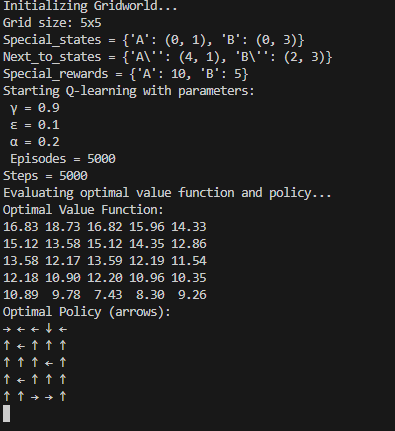

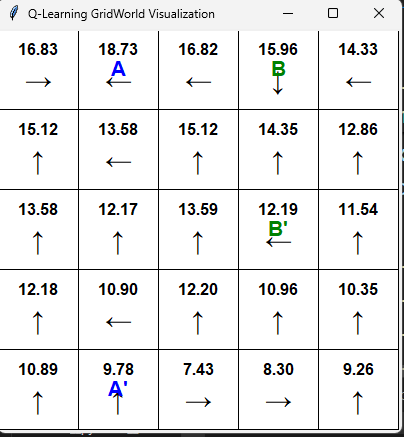